### Classification using Keras 
Note: Keras uses TensorFlow by default. You can switch backend to Theano (see https://keras.io/backend/ for details)

In [264]:
import keras 
keras.__version__

'2.0.4'

In [265]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, log_loss, classification_report
from sklearn.metrics import confusion_matrix , mean_squared_error, r2_score
from sklearn.datasets import load_iris, load_boston

# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD, RMSprop, Adam

iris = load_iris()
X = iris.data
y = iris.target 
X = X.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.7, random_state=707)

nb_classes = len(set(y_train))
print(nb_classes, 'classes')

dims = X_train.shape[1]
print(dims, 'dims')#

y_test_c = y_test
# Convert labels to categorical one-hot encoding (there is also a sklear wrapper)
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

3 classes
4 dims


In [266]:
#### https://keras.io/getting-started/sequential-model-guide/
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=dims))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 100)               500       
_________________________________________________________________
dense_149 (Dense)            (None, 3)                 303       
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [267]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 
Result = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50, 
          batch_size=15, verbose=True, callbacks=[early_stop]) #callbacks=[best_model, early_stop]

Train on 105 samples, validate on 45 samples
Epoch 1/50
105/105 [==============================] - 0s - loss: 1.2667 - acc: 0.3333 - val_loss: 1.0381 - val_acc: 0.3556
Epoch 2/50
105/105 [==============================] - 0s - loss: 1.0018 - acc: 0.4952 - val_loss: 0.9289 - val_acc: 0.3556
Epoch 3/50
105/105 [==============================] - 0s - loss: 0.9208 - acc: 0.5524 - val_loss: 0.8585 - val_acc: 0.8444
Epoch 4/50
105/105 [==============================] - 0s - loss: 0.8417 - acc: 0.8000 - val_loss: 0.8088 - val_acc: 0.6667
Epoch 5/50
105/105 [==============================] - 0s - loss: 0.7862 - acc: 0.6667 - val_loss: 0.7488 - val_acc: 0.9778
Epoch 6/50
105/105 [==============================] - 0s - loss: 0.7317 - acc: 0.7048 - val_loss: 0.7018 - val_acc: 0.9556
Epoch 7/50
105/105 [==============================] - 0s - loss: 0.6949 - acc: 0.8286 - val_loss: 0.6526 - val_acc: 0.9778
Epoch 8/50
105/105 [==============================] - 0s - loss: 0.6440 - acc: 0.8476 - val_lo

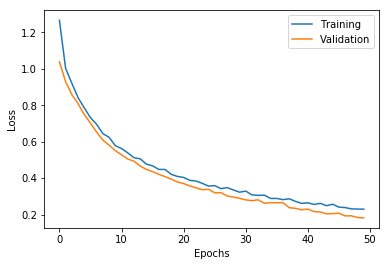

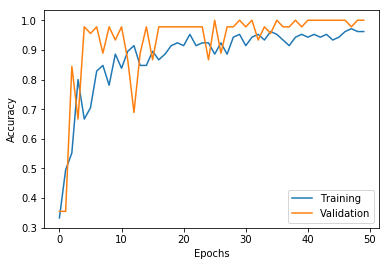

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(Result.history['loss'])
plt.plot(Result.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(Result.history['acc'])
plt.plot(Result.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [269]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print("\n score: ",score)

32/45 [====================>.........] - ETA: 0s
 score:  [0.18169943955209519, 1.0]


In [270]:
y_pred_c = model.predict_classes(X_test)
# Confusion matrix
confusion_matrix(y_test_c, y_pred_c)

32/45 [====================>.........] - ETA: 0s

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])

In [271]:
# Precision 
#precision_score(y_test, y_pred)
log_loss(y_test, y_pred)

0.18169944274963604

In [272]:
y_pred_c[:10]

array([2, 1, 2, 0, 0, 1, 2, 0, 1, 2], dtype=int64)

In [273]:
y_pred[:10]

array([[  5.61227316e-05,   1.86268598e-01,   8.13675284e-01],
       [  5.64851658e-03,   8.38743210e-01,   1.55608237e-01],
       [  1.47026731e-04,   3.50805521e-01,   6.49047494e-01],
       [  9.92429316e-01,   7.44723110e-03,   1.23470003e-04],
       [  9.94610190e-01,   5.32885408e-03,   6.09070084e-05],
       [  2.92654615e-02,   8.35862458e-01,   1.34872079e-01],
       [  1.33497260e-05,   1.30741030e-01,   8.69245648e-01],
       [  9.88747597e-01,   1.11099090e-02,   1.42510864e-04],
       [  4.17491514e-03,   8.12151432e-01,   1.83673695e-01],
       [  1.56149050e-04,   3.54266614e-01,   6.45577312e-01]], dtype=float32)

### Regression example

In [423]:
from sklearn.datasets import load_boston 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_squared_error
boston = load_boston()
Xb, yb = shuffle(boston.data, boston.target, random_state=13)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, train_size=0.751, random_state=717)
scalerS = StandardScaler()
scalerM = MinMaxScaler()
scalerS.fit(Xb_train)
Xb_train = scalerS.transform(Xb_train)
Xb_test = scalerS.transform(Xb_test)

In [424]:
boston.data.shape
scalerM

MinMaxScaler(copy=True, feature_range=(0, 1))

In [647]:
modelb = Sequential()
modelb.add(Dense(52, input_dim=13, activation='relu'))
modelb.add(Dense(26, activation='relu'))
modelb.add(Dense(1, activation='linear'))
# Compile model
modelb.compile(loss='mean_squared_error', optimizer='rmsprop')
modelb.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_360 (Dense)            (None, 52)                728       
_________________________________________________________________
dense_361 (Dense)            (None, 26)                1378      
_________________________________________________________________
dense_362 (Dense)            (None, 1)                 27        
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
_________________________________________________________________


In [648]:
early_stopb = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 
Resultb = modelb.fit(Xb_train, yb_train, validation_data = (Xb_test, yb_test), epochs=200, 
          batch_size=76, verbose=True, callbacks=[early_stopb])

Train on 380 samples, validate on 126 samples
Epoch 1/200
380/380 [==============================] - 1s - loss: 566.1648 - val_loss: 601.7783
Epoch 2/200
380/380 [==============================] - ETA: 0s - loss: 627.764 - 0s - loss: 541.5861 - val_loss: 577.1656
Epoch 3/200
380/380 [==============================] - 0s - loss: 520.7392 - val_loss: 553.3426
Epoch 4/200
380/380 [==============================] - 0s - loss: 500.1651 - val_loss: 529.2089
Epoch 5/200
380/380 [==============================] - 0s - loss: 478.7532 - val_loss: 503.9466
Epoch 6/200
380/380 [==============================] - 0s - loss: 456.2676 - val_loss: 477.7845
Epoch 7/200
380/380 [==============================] - 0s - loss: 432.8802 - val_loss: 450.8349
Epoch 8/200
380/380 [==============================] - 0s - loss: 408.9841 - val_loss: 423.7338
Epoch 9/200
380/380 [==============================] - 0s - loss: 384.5626 - val_loss: 395.9731
Epoch 10/200
380/380 [==============================] - 0s - los

380/380 [==============================] - 0s - loss: 12.4578 - val_loss: 11.0103
Epoch 86/200
380/380 [==============================] - 0s - loss: 12.4472 - val_loss: 10.7253
Epoch 87/200
380/380 [==============================] - 0s - loss: 12.3659 - val_loss: 10.9880
Epoch 88/200
380/380 [==============================] - 0s - loss: 12.2496 - val_loss: 11.1272
Epoch 89/200
380/380 [==============================] - 0s - loss: 12.1556 - val_loss: 10.6605
Epoch 90/200
380/380 [==============================] - 0s - loss: 12.4143 - val_loss: 10.4995
Epoch 91/200
380/380 [==============================] - 0s - loss: 11.9491 - val_loss: 10.6078
Epoch 92/200
380/380 [==============================] - 0s - loss: 12.0758 - val_loss: 10.4704
Epoch 93/200
380/380 [==============================] - 0s - loss: 11.8619 - val_loss: 10.7842
Epoch 94/200
380/380 [==============================] - 0s - loss: 11.7727 - val_loss: 10.4190
Epoch 95/200
380/380 [==============================] - 0s - lo

In [649]:
#[item for item in Resultb.history], [item for item in Result.history]

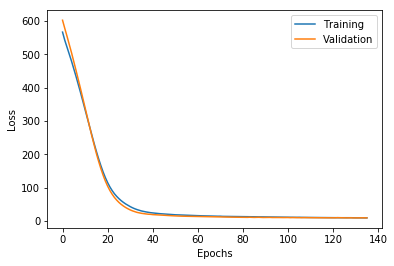

In [650]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(Resultb.history['loss'])
plt.plot(Resultb.history['val_loss'])
plt.legend(['Training', 'Validation'])

In [651]:
yb_predicted = modelb.predict(Xb_test)
score = mean_squared_error(yb_predicted, yb_test)
Rsq = r2_score(yb_test, yb_predicted)
print('MSE: {0:f}'.format(score))
print('RMSE: {0:f}'.format(score**0.5))
print('R^2: {0:f}'.format(Rsq))


MSE: 9.440119
RMSE: 3.072478
R^2: 0.887962


In [652]:
Xb_train.shape

(380, 13)